# **DESAFÍO Nº1: ESTADÍSTICAS DESCRIPTIVAS Y PROBABILIDADES (PARTE I)**
### **Módulo 4: Análisis Estadístico con Python**
#### *Carrera Data Science - G-68 - Desafio Latam*
#### Estudiante: Felipe Leal Arancibia

En este desafío validaremos nuestros conocimientos de estadística descriptiva aprendidos en la sesión. Para lograrlo, necesitarás aplicar lo aprendido, analizando un set de datos asociados a los ingresos obtenidos por la población en base de a la información demográfica entregada en el archivo ds_salaries.csv.

Lee todo el documento antes de comenzar el desarrollo individual, para asegurarte de tener el máximo de puntaje y enfocar bien los esfuerzos. 

Tiempo asociado: 1 hora cronológica

## Descripción

#### El conjunto de datos contiene un informe salarial fabricado en el que puedes realizar análisis para tratar de estimar el salario basado en las condiciones dadas.
(...)
Se busca realizar un análisis estadístico de estos salarios, considerando:

#### P1. El promedio general de los salarios, desviación estándar, quintiles y rango. (hint: escoge la columna adecuada para comparar)

In [1]:
# Se importan librerías para explorar bbdd en cvs
import pandas as pd
import numpy as np

In [2]:
# Se cargan los datos de archivo

salarios = pd.read_csv('ds_salaries.csv')
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [3]:
# Se exploran tipo de datos y cómo se presentan en concreto
salarios.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S


In [4]:
# Se entrega una vista general del dataset, con sus medidas centrales 

salarios.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


##### **Respuesta P1:**

A partir de la tabla anterior ya se puede ver que se presentan los siguientes datos:
- Promedio de salarios (USD): 137570.38
- Desviación estándar salarios (USD): 63055.6

Ambos datos se comprobarán a continuación por separado, y se sumarán los quintiles y el rango.

In [5]:
# Media de salarios en dólares

salarios_promedio = round((salarios['salary_in_usd'].mean()),2)

f'La media de salario en dólares es de: {salarios_promedio}'

'La media de salario en dólares es de: 137570.39'

In [6]:
# Desviación Estándar 

desviacion_std_salarios = round(salarios['salary_in_usd'].std(),2)

f'La desviación estándar de los salarios (USD) es de: {desviacion_std_salarios}'

'La desviación estándar de los salarios (USD) es de: 63055.63'

In [8]:
# quintiles
# Una opción: q1 = salarios['salary_in_usd'].quantile(0.2) ... por cada uno
quintiles = np.quantile(salarios['salary_in_usd'], [1/5, 2/5, 3/5, 4/5, 1])
corte = 1

print('Cada corte de quintil de los salarios en UDS es: ')
# ciclo para simplificar la identificación de los cortes por cada quintil
for quintil in quintiles:
    print(f"Quintil {corte} = {quintil}")
    corte = corte+1

Cada corte de quintil de los salarios en UDS es: 
Quintil 1 = 83972.8
Quintil 2 = 120000.0
Quintil 3 = 149850.0
Quintil 4 = 185900.0
Quintil 5 = 450000.0


In [9]:
# Rango

salarios_rango = salarios['salary_in_usd'].max() - salarios['salary_in_usd'].min()

f'El rango de salarios (USD) es de: {salarios_rango}'

'El rango de salarios (USD) es de: 444868'

-
-
-
___0___o___
-
-
-

#### P2. Una comparación entre los salarios agrupados por 3 diferentes categorías a tu elección. ¿Para cuál de ellas las medidas de tendencia central son más representativas? ¿Para cuál son menos representativas? Explica.

In [35]:
# se importa librería para trabajar con gráficos e identificar mejor las medidas centrales
import matplotlib.pyplot as plt
import seaborn


In [10]:
# se chequean las categorías
salarios.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [71]:
# Se escogen tres categorías: 1) experience_level, 2) employment_type, 3) remote_ratio

  

In [89]:
# a) salarios (usd) por nivel de experiencia

# Renombrar: EN (nivel de entrada / junior), MI (nivel medio / intermedio), SE (nivel senior / experto), EX (nivel ejecutivo / director)

renombrar = {'EN': 'Entrada/Junior', 'MI': 'Medio/Intermedio', 'SE': 'Senior/Experto', 'EX': 'Ejecutivo/Director'}
salarios['experience_level'] = salarios['experience_level'].replace(renombrar)

#salarios['experience_level']

In [74]:
# agrupar salario en usd por experiencia
salario_x_experencia = salarios.groupby('experience_level')['salary_in_usd']

# round(salario_x_experencia.describe().T,2)


In [75]:
# se especifican las medidas de tendencia central a considerar.
media_experiencia = round(salario_x_experencia.mean(),2)
mediana_experiencia = round(salario_x_experencia.median(),2)
moda_experiencia = salario_x_experencia.apply(lambda x: x.mode().iloc[0])
minimo_experiencia = salario_x_experencia.min()
maximo_experiencia = salario_x_experencia.max()

# Se pasan a un dataframe

medidas_centrales = pd.DataFrame({'Mínimo': minimo_experiencia, 'Máximo': maximo_experiencia, 'Media': media_experiencia, 'Mediana': mediana_experiencia, 'Moda': moda_experiencia})

print('Estas son las medidas de tendencia central de salario por nivel de experiencia:')

medidas_centrales

Estas son las medidas de tendencia central de salario por nivel de experiencia:


,Mínimo,Máximo,Media,Mediana,Moda
experience_level,,,,,
Ejecutivo/Director,15000,416000,194930.93,196000.0,200000
Entrada/Junior,5409,300000,78546.28,70000.0,100000
Medio/Intermedio,5132,450000,104525.94,100000.0,100000
Senior/Experto,8000,423834,153051.07,146000.0,120000


/home/hijodelpueblo/anaconda3/envs/desafiolatam1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hijodelpueblo/anaconda3/envs/desafiolatam1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hijodelpueblo/anaconda3/envs/desafiolatam1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hijodelpueblo/anaconda3/envs/desafiolatam1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categoric

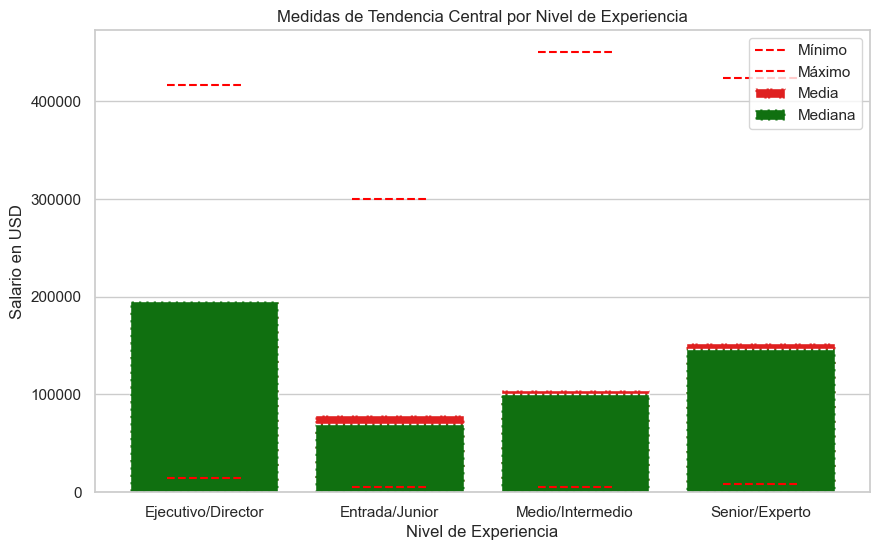

In [88]:
# Para poder interpretar de mejor forma los resultados, se pasa a graficar. 
# El siguiente código fue con apouo de GPT

seaborn.set(style='whitegrid')

plt.figure(figsize=(10, 6))
seaborn.barplot(x=medidas_centrales.index, y='Media', data=medidas_centrales, color='red', linestyle = '-.', label='Media')
seaborn.barplot(x=medidas_centrales.index, y='Mediana', data=medidas_centrales, color='green',linestyle = '--',label='Mediana')

# Líneas para el mínimo y máximo
for i, nivel in enumerate(medidas_centrales.index):
    plt.gca().hlines(y=medidas_centrales['Mínimo'][nivel], xmin=i - 0.2, xmax=i + 0.2, colors='red', linestyles='dashed', label='Mínimo' if i == 0 else '')
    plt.gca().hlines(y=medidas_centrales['Máximo'][nivel], xmin=i - 0.2, xmax=i + 0.2, colors='red', linestyles='dashed', label='Máximo' if i == 0 else '')


plt.title('Medidas de Tendencia Central por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario en USD')
plt.legend()
plt.show()

In [90]:
# Este es un gráfico de bigotes, que permite visualizar de otra forma los datos, pero no se incluye en el desafío
# plt.figure(figsize=(12, 8))
# seaborn.boxplot(x='experience_level', y='salary_in_usd', data=salarios, palette='viridis')
# plt.title('Distribución de Salarios por Nivel de Experiencia')
# plt.xlabel('Nivel de Experiencia')
# plt.ylabel('Salario en USD')
# plt.show()

In [157]:
# renombrar los valores en 'remote_ratio'
# 0 (sin trabajo remoto, menos del 20%), 50 (parcialmente remoto), 100 (totalmente remoto, más del 80%)

renombre_ratios = {'Sin trabajo remoto (<20%)': 'Presencial', 'Parcialmente remoto': 'Híbrido', 'Totalmente remoto (>80%)': 'Remoto'}
salarios['remote_ratio'] = salarios['remote_ratio'].replace(renombre_ratios)

# salarios['remote_ratio']


In [159]:

# renombrar typo de empleo
# PT (tiempo parcial), FT (tiempo completo), CT (contrato), FL (trabajo freelance)
renombre_tipo_empleo = {'PT':'Tiempo parcial', 'FT': 'Tiempo completo', 'CT': 'Contrato', 'FL': 'Trabajo freelance'}
salarios['employment_type'] = salarios['employment_type'].replace(renombre_tipo_empleo)
#salarios['employment_type']


In [110]:
# salarios USD por tipo de emploe
# PT (tiempo parcial), FT (tiempo completo), CT (contrato), FL (trabajo freelance)
  
salario_x_empleo = salarios.groupby('employment_type')['salary_in_usd']
round(salario_x_empleo.describe().T,2)

employment_type,Contrato,Tiempo completo,Tiempo parcial,Trabajo freelance
count,10.00,3718.00,17.00,10.00
mean,113446.90,138314.20,39533.71,51807.80
std,130176.75,62452.18,38312.15,29458.88
min,7500.00,5132.00,5409.00,12000.00
25%,30117.25,95599.00,12000.00,34281.00
50%,75000.00,135000.00,21669.00,50000.00
75%,103750.00,175075.00,52533.00,57500.00
max,416000.00,450000.00,125404.00,100000.00


In [121]:
# salarios (usd) por tipo de trabajo remoto, semi o presencial
# 0 (sin trabajo remoto, menos del 20%), 50 (parcialmente remoto), 100 (totalmente remoto, más del 80%)
 
salario_x_remoto = salarios.groupby('remote_ratio')['salary_in_usd']
round(salario_x_remoto.describe().T,2)

remote_ratio,Híbrido,Presencial,Remoto
count,189.00,1923.00,1643.00
mean,78400.69,144316.20,136481.45
std,61326.13,59799.97,63373.51
min,5409.00,5882.00,5132.00
25%,40570.00,105200.00,90000.00
50%,63312.00,139600.00,135000.00
75%,100000.00,179820.00,180000.00
max,423000.00,450000.00,416000.00


In [17]:
# comparación de la desviación entre las 3
# tabla_pivote = pd.DataFrame(pd.pivot_table(salarios, values=salario_x_remoto.std(), index=['experience_level'], aggfunc=['mean', 'std']))

In [124]:
tabla_pivote = pd.pivot_table(salarios, values='salary_in_usd', index=['experience_level','employment_type', 'remote_ratio'], aggfunc=['mean', 'median', 'min', 'max', 'count'])

tabla_pivote

mean  \
                                                   salary_in_usd   
experience_level   employment_type   remote_ratio                  
Ejecutivo/Director Contrato          Remoto        416000.000000   
                   Tiempo completo   Híbrido       139030.166667   
                                     Presencial    182435.785714   
                                     Remoto        210892.960784   
Entrada/Junior     Contrato          Remoto         65234.500000   
                   Tiempo completo   Híbrido        65344.000000   
                                     Presencial    104581.765766   
                                     Remoto         67015.757576   
                   Tiempo parcial    Híbrido        50851.500000   
                                     Remoto         29910.125000   
                   Trabajo freelance Remoto         75000.000000   
Medio/Intermedio   Contrato          Híbrido         7500.000000   
                                     Remoto         96375.000000   
                   Tiempo completo   Híbrido        77809.695652   
                                     Presencial    116967.972152   
                                     Remoto         97083.542683   
                   Tiempo parcial    Híbrido        28971.000000   
                                     Remoto         69741.000000   
                   Trabajo freelance Híbrido        28777.500000   
                                     Presencial     20000.000000   
                                     Remoto         65261.500000   
Senior/Experto     Contrato          Remoto         97500.000000   
                   Tiempo completo   Híbrido       100744.714286   
                                     Presencial    154024.064706   
                                     Remoto        154208.737601   
                   Trabajo freelance Híbrido        50000.000000   
                                     Remoto         60000.000000   

                                                         median           min  \
                                                  salary_in_usd salary_in_usd   
experience_level   employment_type   remote_ratio                               
Ejecutivo/Director Contrato          Remoto            416000.0        416000   
                   Tiempo completo   Híbrido           128001.0         76309   
                                     Presencial        177550.0         15000   
                                     Remoto            210914.0         69741   
Entrada/Junior     Contrato          Remoto             65234.5         30469   
                   Tiempo completo   Híbrido            50000.0          5409   
                                     Presencial        108000.0          5882   
                                     Remoto             60000.0          6270   
                   Tiempo parcial    Híbrido            25139.0         10354   
                                     Remoto             16872.5         12000   
                   Trabajo freelance Remoto             75000.0         50000   
Medio/Intermedio   Contrato          Híbrido             7500.0          7500   
                                     Remoto             45000.0         25500   
                   Tiempo completo   Híbrido            65257.0          8000   
                                     Presencial        109371.0          9466   
                                     Remoto             90000.0          5132   
                   Tiempo parcial    Híbrido            28971.0          5409   
                                     Remoto             69741.0         69741   
                   Trabajo freelance Híbrido            28777.5         12000   
                                     Presencial         20000.0         20000   
                                     Remoto             65261.5         30523   
Senior/Experto     Contrato          Remoto             97500.0         900

In [155]:
medidas_centrales = salarios.groupby(['experience_level', 'employment_type', 'remote_ratio'])['salary_in_usd'].agg(['mean', 'median']).reset_index()

medidas_centrales

,experience_level,employment_type,remote_ratio,mean,median
0,Ejecutivo/Director,Contrato,Remoto,416000.000000,416000.0
1,Ejecutivo/Director,Tiempo completo,Híbrido,139030.166667,128001.0
2,Ejecutivo/Director,Tiempo completo,Presencial,182435.785714,177550.0
3,Ejecutivo/Director,Tiempo completo,Remoto,210892.960784,210914.0
4,Entrada/Junior,Contrato,Remoto,65234.500000,65234.5
5,Entrada/Junior,Tiempo completo,Híbrido,65344.000000,50000.0
6,Entrada/Junior,Tiempo completo,Presencial,104581.765766,108000.0
7,Entrada/Junior,Tiempo completo,Remoto,67015.757576,60000.0
8,Entrada/Junior,Tiempo parcial,Híbrido,50851.500000,25139.0
9,Entrada/Junior,Tiempo parcial,Remoto,29910.125000,16872.5


/tmp/ipykernel_7399/609441984.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.barplot(x='experience_level', y='mean', hue='employment_type', data=medidas_centrales, dodge=True, palette='viridis', ci=None)
/home/hijodelpueblo/anaconda3/envs/desafiolatam1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hijodelpueblo/anaconda3/envs/desafiolatam1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hijodelpueblo/anaconda3/envs/desafiolatam1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

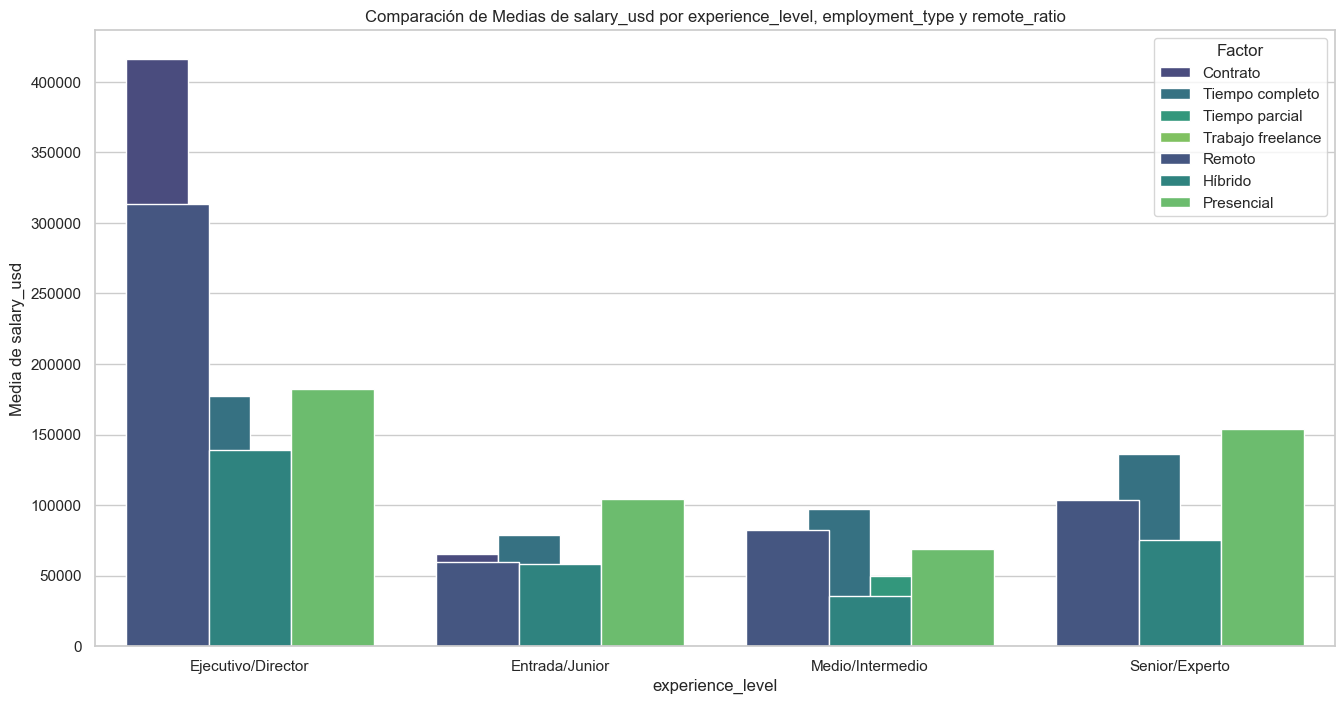

/tmp/ipykernel_7399/609441984.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.barplot(x='experience_level', y='median', hue='employment_type', data=medidas_centrales, dodge=True, palette='viridis', ci=None)
/home/hijodelpueblo/anaconda3/envs/desafiolatam1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hijodelpueblo/anaconda3/envs/desafiolatam1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hijodelpueblo/anaconda3/envs/desafiolatam1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecate

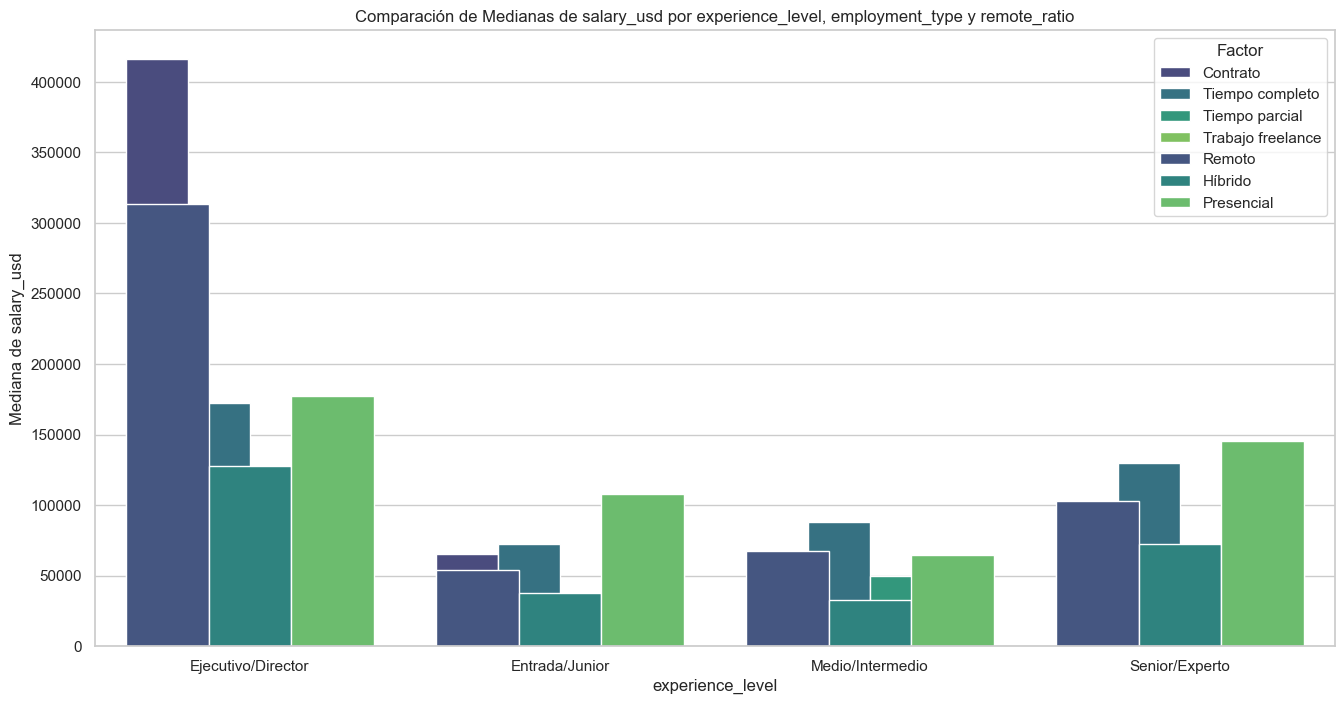

In [147]:
# Gráfico de barras combinado para comparar las medidas de tendencia central
plt.figure(figsize=(16, 8))

# Barplot para la media
seaborn.barplot(x='experience_level', y='mean', hue='employment_type', data=medidas_centrales, dodge=True, palette='viridis', ci=None)
seaborn.barplot(x='experience_level', y='mean', hue='remote_ratio', data=medidas_centrales, dodge=True, palette='viridis', ci=None)

plt.title('Comparación de Medias de salary_usd por experience_level, employment_type y remote_ratio')
plt.xlabel('experience_level')
plt.ylabel('Media de salary_usd')
plt.legend(title='Factor', loc='upper right')
plt.show()

# Gráfico de barras combinado para la mediana
plt.figure(figsize=(16, 8))

seaborn.barplot(x='experience_level', y='median', hue='employment_type', data=medidas_centrales, dodge=True, palette='viridis', ci=None)
seaborn.barplot(x='experience_level', y='median', hue='remote_ratio', data=medidas_centrales, dodge=True, palette='viridis', ci=None)


# Líneas para el mínimo y máximo
for i, nivel in enumerate(medidas_centrales.index):
    plt.gca().hlines(y=medidas_centrales['Mínimo'][nivel], xmin=i - 0.2, xmax=i + 0.2, colors='red', linestyles='dashed', label='Mínimo' if i == 0 else '')
    plt.gca().hlines(y=medidas_centrales['Máximo'][nivel], xmin=i - 0.2, xmax=i + 0.2, colors='red', linestyles='dashed', label='Máximo' if i == 0 else '')

plt.title('Comparación de Medianas de salary_usd por experience_level, employment_type y remote_ratio')
plt.xlabel('experience_level')
plt.ylabel('Mediana de salary_usd')
plt.legend(title='Factor', loc='upper right')
plt.show()

-
-
-
___0___o___
-
-
-

#### 3. ¿Qué cargos reciben mejores sueldos en las empresas con sede en Estados Unidos?

-
-
-
___0___o___
-
-
-

-
-
-
___0_FiN__o___
-
-
-

### Requerimientos
Dentro del archivo de Jupyter Notebook debes ir ejecutando las siguientes acciones y explicar lo que estás haciendo. Debes considerar los siguientes aspectos.

1. Calcular los indicadores estadísticos solicitados, sobre columnas específicas. (3 Puntos)

2. Calcular indicadores estadísticos, agrupando y filtrando los 
valores (3 Puntos)

3. Interpretar los indicadores estadísticos en cada caso, considerando medidas de tendencia central y dispersión.(4 Puntos)